In [95]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import pickle
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model,metrics
from sklearn.metrics import roc_curve, auc

In [96]:
pd.options.display.max_columns=1000

In [97]:
f = open('filePickleEstruct.pkl','rb')
df = pickle.load(f)
f.close
df.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,C1,C2,C4,C6,C7,C8,C9,C10,C11,C12,C13,C14,V12,V13,V19,V20,V29,V30,V53,V54,V56,V60,V61,V62,V64,V69,V70,V282,V283,V290,V291,V292,V302,V303,V304,V310,V314,V315,V317,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,isFraud
0,0.002137,590539.0,0.743044,0.525111,0.381679,590490.0,0.306569,590539.0,0.488636,0.836957,0.000213,0.000176,0.0,0.000444,0.0,0.0000,0.004762,0.000000,0.000627,0.0,0.000343,0.0007,0.333333,0.166667,0.142857,0.066667,0.000000,0.00000,0.200000,0.166667,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.03125,0.014706,0.0,0.0,0.0,0.0000,0.00,0.0000,0.000000,0.0,0.0,0.000873,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000900,590539.0,0.100885,0.608000,0.381679,590539.0,0.014599,590539.0,0.511364,0.836957,0.000213,0.000176,0.0,0.000444,0.0,0.0000,0.000000,0.000000,0.000314,0.0,0.000343,0.0007,0.000000,0.000000,0.142857,0.066667,0.000000,0.00000,0.000000,0.000000,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.03125,0.014706,0.0,0.0,0.0,0.0000,0.00,0.0000,0.000000,0.0,0.0,0.000000,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.001840,590539.0,0.210566,0.780000,0.381679,590535.0,0.481752,590538.0,0.522727,0.836957,0.000213,0.000176,0.0,0.000444,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.000343,0.0007,0.333333,0.166667,0.142857,0.066667,0.000000,0.00000,0.200000,0.166667,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.03125,0.014706,0.0,0.0,0.0,0.0000,0.00,0.0000,0.000000,0.0,0.0,0.000000,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.001558,590539.0,0.984824,0.934000,0.381679,590539.0,0.124088,590538.0,0.854545,0.836957,0.000427,0.000879,0.0,0.001775,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.008568,0.0007,0.333333,0.166667,0.142857,0.066667,0.000000,0.00000,0.200000,0.166667,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0000,0.00,0.0000,0.006422,0.0,0.0,0.010476,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.001558,590506.0,0.201023,0.828000,0.381679,590539.0,0.014599,590539.0,0.727273,0.836957,0.000213,0.000176,0.0,0.000444,0.0,0.0003,0.000000,0.000307,0.000314,0.0,0.000343,0.0007,0.186570,0.099861,0.116624,0.056523,0.077568,0.04516,0.115517,0.103330,0.021980,0.008909,0.138297,0.086756,0.020261,0.07804,0.067987,0.03125,0.014706,0.0,0.0,0.0,0.0625,0.05,0.0625,0.000000,0.0,0.0,0.000000,1.000000,0.070815,0.593674,0.933013,1.000000,144232.0,0.704687,144232.0,144232.0,0.511628,0.774081,0.078431,144232.0,144232.0,141698.0,144231.0,144232.0,144232.0,144226.0,144232.0,0


In [98]:
dataX=df.drop('isFraud',axis=1)
tarjetY=df[['isFraud']]

In [99]:
X2_train, X2_test, y2_train, y2_test \
= train_test_split(dataX, tarjetY, stratify=tarjetY, test_size=0.1, random_state=0)#Separar en entrenamiento y test

ros = RandomOverSampler(sampling_strategy='minority')#Se aumenta el conjunto de datos training
dataX2, tarjetY2 = ros.fit_resample(X2_train, y2_train)#Se separa en training y validation

X3_train, X3_test, y3_train, y3_test \
= train_test_split(dataX2, tarjetY2, stratify=tarjetY2, test_size=0.2, random_state=0)


In [100]:
#https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/
#https://www.kaggle.com/code/surananitish/tarp-neural-network

#model = models.Sequential()
#model.add(layers.Dense(2,activation='relu'))
#model.add(layers.Dense(5,activation='relu'))
#model.add(layers.Dense(3,activation='relu'))
#model.add(layers.Dense(1))

#model = models.Sequential()
#model.add(layers.Dense(2,activation='relu'))
#model.add(layers.Dense(3,activation='relu'))
#model.add(layers.Dense(1,activation='sigmoid'))

#model = models.Sequential()
#model.add(layers.Dense(2,activation='tanh'))
#model.add(layers.Dense(7,activation='tanh'))
#model.add(layers.Dropout(rate=0.1))         
#model.add(layers.Dense(1,activation='sigmoid'))

model = models.Sequential()
model.add(layers.Dense(2,activation='tanh'))
model.add(layers.Dense(200,activation='tanh'))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(300,activation='tanh'))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(400,activation='tanh'))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile( loss= keras.losses.binary_crossentropy,
                optimizer = keras.optimizers.Adam(lr = 0.5),
                metrics = ['accuracy'])

    

#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [101]:
#history = model.fit(x=X_train,y=y_train.values,epochs=1,batch_size=1000,validation_split=0.2)
#history = model.fit(x=X2_train,y=y2_train.values,epochs=5,batch_size=100,validation_data=(X2_test,y2_test)) #al menos tiene algo de lógica
#history = model.fit(x=dataX2,y=tarjetY2.values,epochs=5,batch_size=100,validation_data=(X_test,y_test)) 
#history = model.fit(x=X2_train,y=y2_train.values,epochs=5,batch_size=100,validation_split=0.2)

history = model.fit(x=X3_train,y=y3_train.values,epochs=5,batch_size=100,validation_data=(X3_test,y3_test)) 

Epoch 1/5
8205/8205 [==============================] - 23s 3ms/step - loss: 0.6518 - accuracy: 0.6377 - val_loss: 0.6535 - val_accuracy: 0.6392
Epoch 2/5
8205/8205 [==============================] - 22s 3ms/step - loss: 0.6513 - accuracy: 0.6379 - val_loss: 0.6513 - val_accuracy: 0.6392
Epoch 3/5
8205/8205 [==============================] - 22s 3ms/step - loss: 0.6511 - accuracy: 0.6379 - val_loss: 0.6495 - val_accuracy: 0.6392
Epoch 4/5
8205/8205 [==============================] - 22s 3ms/step - loss: 0.6509 - accuracy: 0.6379 - val_loss: 0.6504 - val_accuracy: 0.6392
Epoch 5/5
8205/8205 [==============================] - 22s 3ms/step - loss: 0.6510 - accuracy: 0.6379 - val_loss: 0.6499 - val_accuracy: 0.6392


In [102]:
predicciones=model.predict(X2_test)

1846/1846 [==============================] - 1s 655us/step


In [103]:
score = metrics.roc_auc_score(y2_test, predicciones)

In [104]:
print(score)

0.6365715091456885


In [105]:
print(predicciones)

[[0.7058612 ]
 [0.37467566]
 [0.37467566]
 ...
 [0.37467566]
 [0.37467566]
 [0.7058612 ]]


In [106]:
for p in predicciones:
    print(p)

[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.374

[0.7058612]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]


[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.

[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]


[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.3746756

[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.

[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37

[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.7058612]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7

[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7

[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]


[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]

[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.70

[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0

[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7058612]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.37467566]
[0.7058612]
[0.7

In [107]:
dfFraudeNoFraude = np.where(predicciones >= 0.5, 1, 0)
df_predicciones = pd.DataFrame(dfFraudeNoFraude, columns=['Fraude'])
df_predicciones

,Fraude
0,1
1,0
2,0
3,0
4,0
...,...
59036,0
59037,1
59038,0
59039,0


In [39]:
#import pickle

filePickleT = open('tensorFlowY2IniTest.pkl','wb')
pickle.dump(y2_test,filePickleT)
filePickleT.close()

In [40]:
import pickle

filePickle = open('tensorFlowIniPredicciones.pkl','wb')
pickle.dump(df_predicciones,filePickle)
filePickle.close()

In [108]:
print("Matriz de confusión:\n%s" % (metrics.confusion_matrix(y2_test, df_predicciones['Fraude'])))
false_positive_rate, true_positive_rate, thresholds  = metrics.roc_curve(y2_test, predicciones)
roc_auc = auc(false_positive_rate, true_positive_rate)

Matriz de confusión:
[[45306 11670]
 [ 1078   987]]


MÉTRICAS -->
 AUC: 0.637 ACC: 0.784  PREC: 0.784  RECALL: 0.784  F1: 0.784


<AxesSubplot:title={'center':'Matriz de confusión'}, xlabel='Predicted label', ylabel='True label'>

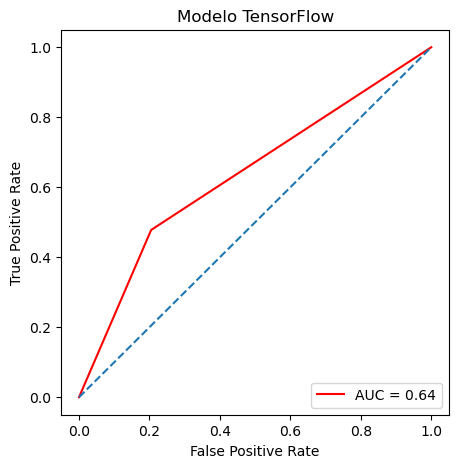

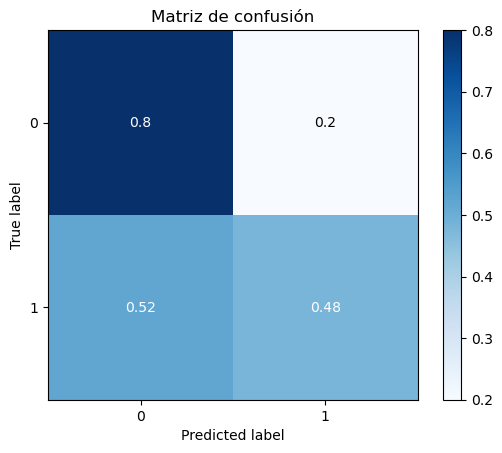

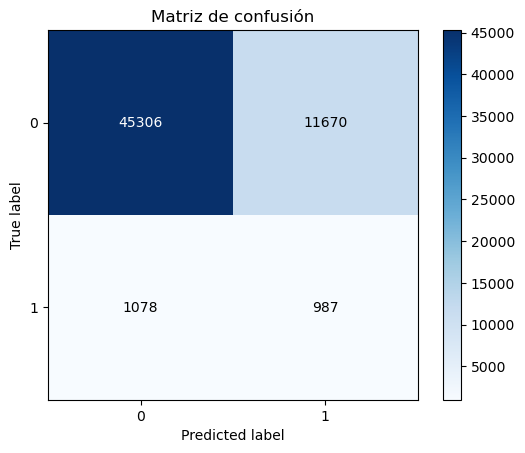

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import scikitplot as skplt


metricasClas = {
      'AUC': metrics.roc_auc_score,  
      'ACC':    metrics.accuracy_score,
      'PREC':   lambda y_true, y_pred:
                metrics.precision_score(y_true, y_pred,
                  average='micro'), 
      'RECALL': lambda y_true, y_pred:
                metrics.recall_score(y_true, y_pred,
                  average='micro'),
      'F1':     lambda y_true, y_pred:
                metrics.f1_score(y_true, y_pred, average='micro')}


plt.figure(figsize=(5,5))
plt.title('Modelo TensorFlow')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


ACC = metricasClas['ACC'](y2_test, df_predicciones['Fraude'])
PREC = metricasClas['PREC'](y2_test, df_predicciones['Fraude'])
RECALL = metricasClas['RECALL'](y2_test, df_predicciones['Fraude'])
F1 = metricasClas['F1'](y2_test, df_predicciones['Fraude'])

print("%s\n AUC: %.3f ACC: %.3f  PREC: %.3f  RECALL: %.3f  F1: %.3f" %
                      ('MÉTRICAS -->',roc_auc, ACC,PREC,RECALL,F1))   



matriz_confusion = confusion_matrix(y2_test, df_predicciones['Fraude'])

skplt.metrics.plot_confusion_matrix(y2_test, df_predicciones['Fraude'], normalize=True, title='Matriz de confusión')
skplt.metrics.plot_confusion_matrix(y2_test, df_predicciones['Fraude'], title='Matriz de confusión')